In [2]:
from IPython.display import display, Image
import ipywidgets as widgets
import threading

from jetcam.utils import bgr8_to_jpeg

In [5]:
from jetcam.csi_camera import CSICamera

camera = CSICamera(capture_width=1280, capture_height=720, downsample=2, capture_fps=30)

Error generated. /dvs/git/dirty/git-master_linux/multimedia/nvgstreamer/gst-nvarguscamera/gstnvarguscamerasrc.cpp, execute:770 Failed to create CaptureSession
[ WARN:0] global /home/ubuntu/build_opencv/opencv/modules/videoio/src/cap_gstreamer.cpp (1100) open OpenCV | GStreamer warning: Cannot query video position: status=0, value=-1, duration=-1
[ WARN:0] global /home/ubuntu/build_opencv/opencv/modules/videoio/src/cap_gstreamer.cpp (1390) setProperty OpenCV | GStreamer warning: GStreamer: unhandled property
Error generated. /dvs/git/dirty/git-master_linux/multimedia/nvgstreamer/gst-nvarguscamera/gstnvarguscamerasrc.cpp, execute:770 Failed to create CaptureSession


In [ ]:

# Stop button
# ================
stopButton = widgets.Checkbox(
    value=False,
    description='Streaming',
    disabled=False,
    indent=False,
)

# Display function
# ================
def view(button):
    frame = camera.read()
    display_handle=display(Image(data=bgr8_to_jpeg(frame)), display_id=True)

    while True:
        if stopButton.value:
            frame = camera.read()
            display_handle.update(Image(data=bgr8_to_jpeg(frame)))

Checkbox(value=False, description='Streaming', indent=False)

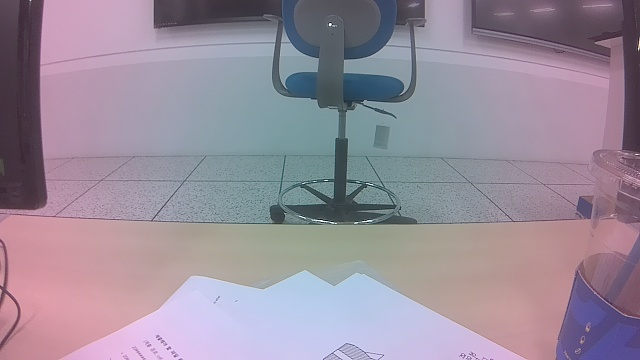

In [5]:
# Run
# ================
display(stopButton)
thread = threading.Thread(target=view, args=(stopButton,))
thread.start()

In [4]:
camera.release()